### Provide required inputs

1. the schema
2. its compling dataset

In [1]:
schema = "./Examples/Parking_Places/schema.json"
dataset = "./Examples/Parking_Places/data.csv"

### Import the right extractor according to provided inputs

Presently, we propose two extractors:
1. read_jsonSchema_geojsonData
2. read_tableSchema_csvData

In [2]:
from library.read import read_tableSchema_csvData

From here, we start the **ETL** process:
1. **E**xtract
2. **T**ransform
3. **L**oad

### 1. Extractor: Bundle graph initialisation

In [3]:
b0 = read_tableSchema_csvData(schema, dataset)

##### Overview of the Global Semantic Model

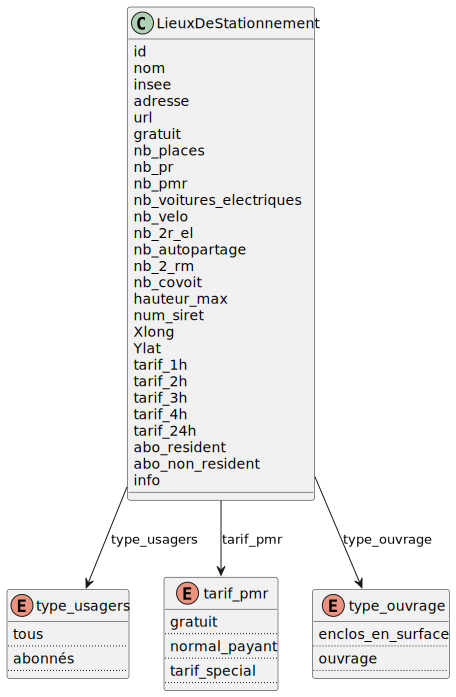

In [4]:
b0.show_semantic_model(True)

### 2. Transformers

In this example, we apply the `document` transformer on type_usagers, tarif_pmr and type_ouvrage enumeration bundles.

In [5]:
dangling_bundles = b0.children()
dangling_bundles["type_usagers"].document(enum_values = {"tous":"tout usager",
                                                         "abonnés": "uniquement abonné"
    
})
dangling_bundles["tarif_pmr"].document(enum_values = {"gratuit":"ne coûte rien",
                                                      "normal_payant": "paiement normal",
                                                      "tarif_special": "paiement spécial"
    
})
dangling_bundles["type_ouvrage"].document(enum_values = {"enclos_en_surface":"à barrière en surface",
                                                         "ouvrage":"comprend les parkings souterrains et les parkings en élévation"
    
})
dangling_bundles["type_ouvrage"].show()

------- Enumeration -------
name : type_ouvrage
IRI : None
definition : Précision sur le type de construction de l'équipement.
type : string
required : False
	 ------- Values -------
	 name : enclos_en_surface
	 definition : à barrière en surface
	 IRI : None
	 --------------
	 name : ouvrage
	 definition : comprend les parkings souterrains et les parkings en élévation
	 IRI : None
	 --------------


### 3. Loaders

Presently, we propose two loaders:
1. generateOntology
2. generateRDF

#### 3.1 Generate the ontology

In [5]:
g, kpi_results = b0.generateOntology(True)

##### Overview of the generated ontology

In [8]:
kpi_results

,IRI,type,related
0,https://data.grandlyon.com/onto/Lieuxdestation...,Class,NA
1,https://data.grandlyon.com/onto/id,DatatypeProperty,LieuxDeStationnement
2,https://data.grandlyon.com/onto/nom,DatatypeProperty,LieuxDeStationnement
3,https://data.grandlyon.com/onto/insee,DatatypeProperty,LieuxDeStationnement
4,https://data.grandlyon.com/onto/adresse,DatatypeProperty,LieuxDeStationnement
5,https://data.grandlyon.com/onto/url,DatatypeProperty,LieuxDeStationnement
6,https://data.grandlyon.com/onto/gratuit,DatatypeProperty,LieuxDeStationnement
7,https://data.grandlyon.com/onto/nbPlaces,DatatypeProperty,LieuxDeStationnement
8,https://data.grandlyon.com/onto/nbPr,DatatypeProperty,LieuxDeStationnement
9,https://data.grandlyon.com/onto/nbPmr,DatatypeProperty,LieuxDeStationnement


##### Save the ontology in a file

In [7]:
with open("./results/onto.ttl", "w") as f:
    f.write(g.serialize(format="turtle"))

#### 3.2 Generate the RDF data

In [4]:
g_rdf = b0.generateRDF(True)

##### Save the RDf data in a file

In [5]:
with open("./results/instances.ttl", "w") as f:
    f.write(g_rdf.serialize(format="turtle"))